
This is an example digital architecture based on Eyeriss by Yu-Hsin Chen, Tushar
Krishna, Joel Emer, and Vivienne Sze.

Some of the important variables for example_traditional:

- *TECHNOLOGY*: 5 nm
- *SUPPORTED_INPUT_BITS*: 8 bit(s)
- *SUPPORTED_OUTPUT_BITS*: 16 bit(s)
- *SUPPORTED_WEIGHT_BITS*: 8 bit(s)
- *GLOBAL_CYCLE_SECONDS*: 1e-09 clock period

Components are defined the following places:
- workspace/models/arch/1_macro/example_traditional/example_components/components.csv
- workspace/models/arch/1_macro/example_traditional/components.yaml
- The top-level components locations
  - workspace/models/components/components/*.yaml
  - workspace/models/components/components/accelergy_plug_ins/*.py
  
Place new components in any of these places!



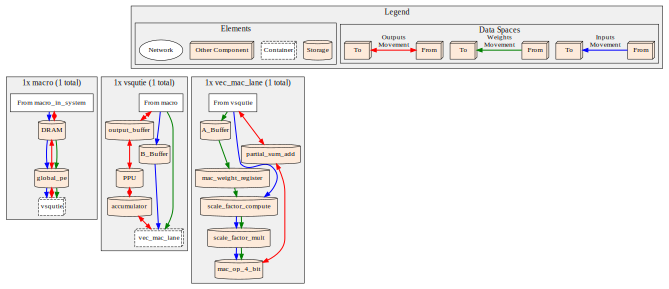

In [51]:
from _tests import scripts
from scripts.notebook_utils import *
import importlib
importlib.reload(scripts.notebook_utils)

display_markdown(
    f"""
This is an example digital architecture based on Eyeriss by Yu-Hsin Chen, Tushar
Krishna, Joel Emer, and Vivienne Sze.

{get_important_variables_markdown('example_traditional')}

Components are defined the following places:
- workspace/models/arch/1_macro/example_traditional/example_components/components.csv
- workspace/models/arch/1_macro/example_traditional/components.yaml
- The top-level components locations
  - workspace/models/components/components/*.yaml
  - workspace/models/components/components/accelergy_plug_ins/*.py
  
Place new components in any of these places!

"""
)
display_diagram(get_diagram("example_traditional", ignore=DIAGRAM_DEFAULT_IGNORE))

In [57]:
# result = run_test("example_traditional", "test_area_energy_breakdown")
# fig, axs = plt.subplots(1, 2, figsize=(20, 5))
# bar_stacked(
#     {f"Speculation {r.variables['QUANTIZE']}": r.per_compute('per_component_energy')*1e15 for r in result},
#     ylabel="Energy (fJ/MAC)",
#     title=f"Energy Breakdown",
#     ax=axs[0]
# )
# bar_stacked(
#     {f"Speculation {r.variables['QUANTIZE']}": r.per_compute('per_component_area')*1e12 for r in result},
#     ylabel="Area (um^2)",
#     title=f"Area Breakdown",
#     ax=axs[1]
# )

import pytimeloop.timeloopfe.v4 as tl
from joblib import Parallel, delayed
 
# Basic setup. Gathers input files, checks for errors
spec = tl.Specification.from_yaml_files(
  "arch.yaml", "components.yaml", "vsq_problem.yaml", "mapper.yaml"
)
# Call Timeloop mapper
tl.call_mapper(spec, output_dir="your_output_dir")
# Call Accelergy verbose
tl.call_accelergy_verbose(spec, output_dir="your_output_dir")
 

RuntimeError: 

========================================================================================================================
Timeloop mapper failed with return code 134. Please check the output files in your_output_dir for more information. To debug, you can edit the file:
	your_output_dir/parsed-processed-input.yaml
and run 
	tl mapper your_output_dir/parsed-processed-input.yaml
to see the error. If you're running the mapper and Timeloop can't find a vaild mapping, try setting 'diagnostics: true' in the mapper input specification.